<img style="float: left; width: 300px;" src="images/contourtraj.png">
***
# <font color="grey">    Lecture 3 - Gradient Descent</font>
***
$\newcommand{\vct}[1]{\mathbf{#1}}$
$\newcommand{\mtx}[1]{\mathbf{#1}}$
$\newcommand{\e}{\varepsilon}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\minimize}{\text{minimize}\quad}$
$\newcommand{\maximize}{\text{maximize}\quad}$
$\newcommand{\subjto}{\quad\text{subject to}\quad}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\trans}{T}$
$\newcommand{\ip}[2]{\langle {#1}, {#2} \rangle}$
$\newcommand{\zerovct}{\vct{0}}$
$\newcommand{\diff}[1]{\mathrm{d}{#1}}$

Most modern optimization methods are iterative: they generate a sequence of points $\vct{x}_0,\vct{x}_1,\dots$ in $\R^n$
in the hope that this sequences will converge to a local or global minimizer $\vct{x}^*$ of a function $f(\vct{x})$. A typical rule for generating such a sequence would be to start with a vector $\vct{x}_0$, chosen by an educated guess, and then for $k\geq 0$, move from step $k$ to $k+1$ by

\begin{equation*}
 \vct{x}_{k+1} = \vct{x}_k+\alpha_k\vct{p}_k,
\end{equation*}

in a way that ensures that $f(\vct{x}_{k+1})\leq f(\vct{x}_k)$.
The parameter $\alpha_k$ is called the **step length**, while $\vct{p}_k$ is the **search direction**. In this lecture we discuss one such method, the method of gradient descent, or steepest descent, and discuss how to select the right step length.

---
## <font color="grey">Gradient descent</font>
---

In the method of gradient descent, the search direction is chosen as

\begin{equation*}
 \vct{p}_k = -\nabla f(\vct{x}_k).
\end{equation*}

To see why this makes sense, let $\vct{p}$ be a direction and consider the Taylor expansion

\begin{equation*}
 f(\vct{x}_k+\alpha \vct{p}) = f(\vct{x}_k)+\alpha \ip{\vct{p}}{\nabla f(\vct{x}_k)}+O(\alpha^2).
\end{equation*}

Considering this as a function of $\alpha$, the rate of change in direction $\vct{p}$ at $\vct{x}_k$ is the derivative of this function at $\alpha=0$,

\begin{equation*}
 \frac{\diff{f}(\vct{x}_k+\alpha \vct{p})}{\diff{\alpha}}|_{\alpha=0} = \ip{\vct{p}}{\nabla f(\vct{x}_k)},
\end{equation*}

also known as the **directional derivative** of $f$ at $\vct{x}_k$ in the direction $\vct{p}$.
This formula indicates that the rate of change is *negative*, and we have a **descent direction**, if $\ip{\vct{p}}{\nabla f(\vct{x}_k)}<0$. 

The Cauchy-Schwarz inequality (see Preliminaries, Page 9) gives the bounds

\begin{equation*}
 -\norm{\vct{p}}_2 \norm{\nabla f(\vct{x}_k)}_2 \leq \ip{\vct{p}}{\nabla f(\vct{x}_k)} \leq \norm{\vct{p}}_2 \norm{\nabla f(\vct{x}_k)}_2.
\end{equation*}

We see that the rate of change is the smallest when the first inequality is an equality, which happens if 

\begin{equation*}
 \vct{p} = -\alpha \nabla f(\vct{x}_k)
\end{equation*}

for some $\alpha>0$. 

For a visual interpretation of what it means to be a descent direction, note that the **angle** $\theta$ between a vector $\vct{p}$ and the gradient $\nabla f(\vct{x})$ at a point $\vct{x}$ is given by (see Preliminaries, Page 9)

\begin{equation*}
  \ip{\vct{x}}{\nabla f(\vct{x})} = \norm{\vct{p}}_2\norm{\nabla f(\vct{x})}_2 \cos(\theta).
\end{equation*}

This is negative if the vector $\vct{p}$ forms and angle greater than $\pi/2$ with the gradient. Recall that the gradient points in the direction of steepest ascent, and is orthogonal to the *level sets*. If you are standing on the slope of a mountain, walking along the level set lines will not change your elevation, the gradient points to the steepest upward direction, and the negative gradient to the steepest descent.

![Descent](images/descent.png)

Any multiple $\alpha \nabla f(\vct{x}_k)$ points in the direction of steepest descent, but we have to choose a sensible parameter $\alpha$ to ensure that we make sufficient progress, but at the same time don't overshoot. Ideally, we would choose the value $\alpha_k$ that minimizes $f(\vct{x}_k-\alpha_k \nabla f(\vct{x}_k))$. While finding such a minimizer is in general not easy, for quadratic functions in can be given in closed form.


---
### <font color="grey">Linear least squares</font>
---

Consider a function of the form

\begin{equation*}
 f(\vct{x}) = \frac{1}{2}\norm{\mtx{A}\vct{x}-\vct{b}}_2^2.
\end{equation*}

In Problem Sheet 1 you will show that that the Hessian is symmetric and positive semidefinite, with the gradient given by

\begin{equation*}
 \nabla f(\vct{x}) = \mtx{A}^{\trans}(\mtx{A}\vct{x}-\vct{b}).
\end{equation*}

The method of gradient descent proceeds as

\begin{equation*}
 \vct{x}_{k+1} = \vct{x}_k-\alpha_k \mtx{A}^{\top}(\mtx{A}\vct{x}_k-\vct{b}).
\end{equation*}

To find the best $\alpha_k$, we compute the minimum of the function

[1]
\begin{equation*}
 \alpha \mapsto f(\vct{x}_k-\alpha \mtx{A}^{\trans}(\mtx{A}\vct{x}_k-\vct{b})).
\end{equation*}

If we set $\vct{r}_k:=\mtx{A}^{\trans}(\vct{b}-\mtx{A}\vct{x}_k) = -\nabla f(\vct{x}_k)$ and compute the minimum of [1] by differentiating, we get the step length

\begin{equation*}
 \alpha_k = \frac{\vct{r}_k^{\trans}\vct{r}_k}{\vct{r}_k^{\trans}\mtx{A}^\trans\mtx{A}\vct{r}_k} = \frac{\norm{\vct{r}_k}_2^2}{\norm{\mtx{A}\vct{r}_k}_2^2}.
\end{equation*}

(Verify this!) Note also that when we have $\vct{r}_k$ and $\alpha_k$, we can compute the next $\vct{r}_k$ as

\begin{align*}
 r_{k+1} &= \mtx{A}^{\trans}(\vct{b}-\mtx{A}\vct{x}_{k+1})\\
         &= \mtx{A}^{\trans}(\vct{b}-\mtx{A}(\vct{x}_{k}+\alpha_k \vct{r}_k))\\
         &= \mtx{A}^{\trans}(\vct{b}-\mtx{A}\vct{x}_k - \alpha_k \mtx{A}^{\trans}\mtx{A}\vct{r}_k) = \vct{r}_k - \alpha_k \mtx{A}^{\trans}\mtx{A}\vct{r}_k.
\end{align*}

The gradient descent algorithm for the linear least squares problem proceeds by first computing $\vct{r}_0=\mtx{A}^{\trans}(\vct{b}-\mtx{A}\vct{x}_0)$, and then at each step

\begin{align*}
 \alpha_k &= \frac{\vct{r}_k^{\trans}\vct{r}_k}{\vct{r}_k^{\trans}\mtx{A}^\trans\mtx{A}\vct{r}_k}\\
 \vct{x}_{k+1} &= \vct{x}_k+\alpha_k \vct{r}_k\\
 \vct{r}_{k+1} &= \vct{r}_k - \alpha_{k}\mtx{A}^{\trans}\mtx{A}\vct{r}_k.
\end{align*}

Does this work? How do we know when to stop? It is worth noting that the residual satisfies $\vct{r}=0$ if and only if $\vct{x}$ is a stationary point, in our case, a minimizer. One criteria for stopping could then be to check whether $\norm{\vct{r}_k}_2\leq \e$ for some given tolerance $\e>0$. One potential problem with this criterion is that the function can become *flat* long before reaching a minimum, so an alternative stopping method would be to stop when the difference between two successive points, $\norm{\vct{x}_{k+1}-\vct{x}_k}_2$, becomes smaller than some $\e>0$.

**Example.** We plot the trajectory of gradient descent with the data
\begin{equation*}
\mtx{A} = \begin{pmatrix}
2 & 0\\
1 & 3\\
0 & 1
\end{pmatrix}, \quad
\vct{b} = \begin{pmatrix}
1\\ -1\\ 0
\end{pmatrix}.
\end{equation*}

The Python code below implements the gradient descent algorithm above. The stopping criteria used is that the residual $\vct{r}_k$ becomes smaller than the tolerance in the 2-norm.

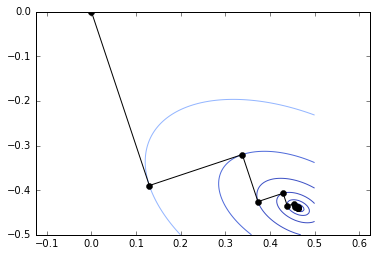

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# The function graddesc performs the gradient descent algorithm with starting value x and tolerance tol
def graddesc(A, b, x, tol):
    """
    Input: matrix A, vector b, vector x, tolarance tol
    Output: trajectory of points x_0,x_1,... of the gradient descent method
    """
    # Compute the negative gradient r = A^T(b-Ax)
    r = np.dot(A.transpose(),b-np.dot(A,x))
    # Start with an empty array
    xout = [x]
    while la.norm(r,2) > tol:
        # If the gradient is bigger than the tolerance
        Ar = np.dot(A,r)
        alpha = np.dot(r,r)/np.dot(Ar,Ar)
        x = x + alpha*r
        xout.append(x)
        r = r-alpha*np.dot(A.transpose(),Ar)
    return np.array(xout).transpose()

# Define the matrix A and the vector b for the problem we consider, as well as the zero starting point
A = np.array([[2,0], [1,3], [0,1]])
b = np.array([1, -1, 0])
tol = 1e-4
x = np.zeros(2)

# Call the gradient descent function with input A and with starting value x=0
traj = graddesc(A, b, x, tol)

# Plot
%matplotlib inline

# Define the function we aim to minimize
def f(x):
    return np.dot(np.dot(A,x)-b,np.dot(A,x)-b)

# Determine the values of the function for the first 7 steps
# This is used to specify the location of the level sets
fvals = []
for i in range(7):
    fvals.append(f(traj[:,i]))
    
# Create a mesh grid for plotting the contours / level sets 
xx = np.linspace(0.1,0.5,100)
yy = np.linspace(-0.5,-0.1,100)
X, Y = np.meshgrid(xx, yy)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = f(np.array([X[i,j], Y[i,j]]))

# Get a nice monotone colormap
cmap = plt.cm.get_cmap("coolwarm")

# Plot the contours and the trajectory
plt.contour(X, Y, Z, cmap = cmap, levels = list(reversed(fvals)))
plt.plot(traj[0,:], traj[1,:], 'o-k')
#plt.axis('off')
plt.xlim([0.1,0.5])
plt.ylim([-0.5,-0.15])
plt.axis('equal')
plt.show()